#Question 4-
You are provided with daily annual rainfall in Boston for 65 years (1950-2014). Calculate 
monthly mean of the dataset. Use 50 years of data for training (using ARIMA process) and 
predict the Precipitation of Boston for the last 15 years. Report performance measure (MSE).  
Try box-cox transformation where 𝜆=2 and predict again. Retransform the dataset to initial 
form of the time series and find out the performance measure (MSE). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts = pd.read_csv('/content/data_Precipitation.csv', index_col = 'Date', usecols=['Date','Precipitation'], parse_dates = True)
ts.head()

,Precipitation
Date,
1950-01-01,0.005900
1950-01-02,0.057000
1950-01-03,4.413605
1950-01-04,27.583983
1950-01-05,1.988475


monthly mean

In [2]:
mm = pd.read_csv('/content/data_Precipitation.csv')
mm['Date'] = pd.to_datetime(mm['Date'])
mm.resample('M', on='Date').mean()

,Precipitation
Date,
1950-01-31,7.474498
1950-02-28,4.236547
1950-03-31,2.909981
1950-04-30,3.584058
1950-05-31,2.503505
...,...
2014-08-31,2.246686
2014-09-30,2.606470
2014-10-31,6.045129


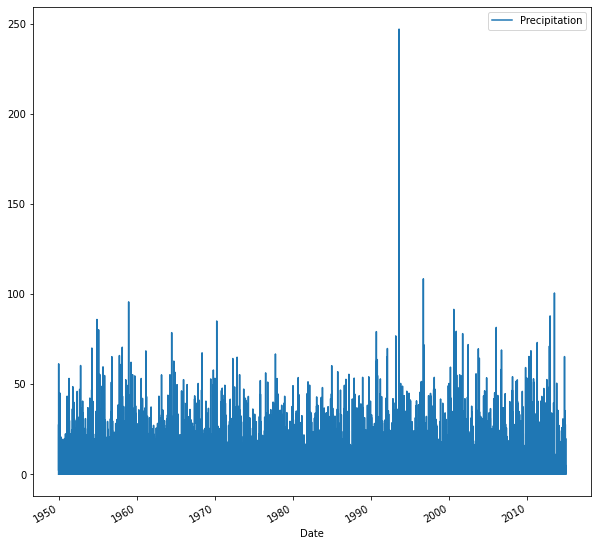

In [3]:
#plotting my data
ts.plot(figsize=(10,10))
plt.show()

In [4]:
#checking if data is stationary
from statsmodels.tsa.stattools import adfuller
results = adfuller(ts['Precipitation'])
print(results[0])
print('P value is:', results[1])

-108.39772634860783
P value is: 0.0


#the above data is stationary

In [5]:
!pip install pmdarima

In [6]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

Wise_fit = auto_arima(ts['Precipitation'], trace = True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=167418.179, Time=20.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=167799.476, Time=1.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=167488.572, Time=1.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=167455.838, Time=6.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=172002.343, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=167418.717, Time=24.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=167416.599, Time=14.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=167431.898, Time=13.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=167415.898, Time=1.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=167416.453, Time=3.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=167418.447, Time=9.84 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=170268.896, Time=0.59 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 97.209 seconds


In [7]:
df2 = pd.read_csv('/content/data_Precipitation.csv')
df2['Date'] = pd.to_datetime(df2['Date'])

In [8]:
#Splitting into train and test
train = df2.loc[df2['Date'] <= '1999-12-31']
test = df2.loc[df2['Date']>= '2000-01-01']


In [9]:

from statsmodels.tsa.arima.model import ARIMA
model_train = ARIMA(train['Precipitation'], order = (2,0,0))
model_train = model_train.fit()

In [10]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Precipitation   No. Observations:                18250
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -64178.035
Date:                Tue, 29 Mar 2022   AIC                         128364.070
Time:                        00:16:21   BIC                         128395.318
Sample:                             0   HQIC                        128374.339
                              - 18250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6417      0.088     41.593      0.000       3.470       3.813
ar.L1          0.1283      0.005     24.032      0.000       0.118       0.139
ar.L2         -0.0541      0.007     -8.026      0.000      -0.067      -0.041
sigma2        66.3814      0.185    359.510      0.000      66.020      66.743
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           2719339.23
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             4.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
test.head()

,Date,Precipitation
18250,2000-01-01,0.000046
18251,2000-01-02,5.651877
18252,2000-01-03,7.189747
18253,2000-01-04,0.971326
18254,2000-01-05,50.309398


In [12]:
#testing part
import datetime
start = len(train)

end = len(train)+len(test)-1
test['forecast']= model_train.predict( start=start, end=end, dynamic=False)
#test[['Precipitation','forecast']].plot(figsize=(12,8))

In [13]:
test.head()

,Date,Precipitation,forecast
18250,2000-01-01,0.000046,2.625337
18251,2000-01-02,5.651877,3.708418
18252,2000-01-03,7.189747,3.705288
18253,2000-01-04,0.971326,3.646247
18254,2000-01-05,50.309398,3.638839


In [37]:
from sklearn.metrics import mean_squared_error

print('MSE without using the boxcox transform:',mean_squared_error(test1.Precipitation, test1.forecast))

MSE without using the boxcox transform: 73.91905514465313


#uisng boxcox transformation


In [16]:
from scipy.stats import boxcox
df_pos = ts.loc[ts['Precipitation'] > 0]
df_pos['Precipitation'] = boxcox(df_pos['Precipitation'], lmbda=2)

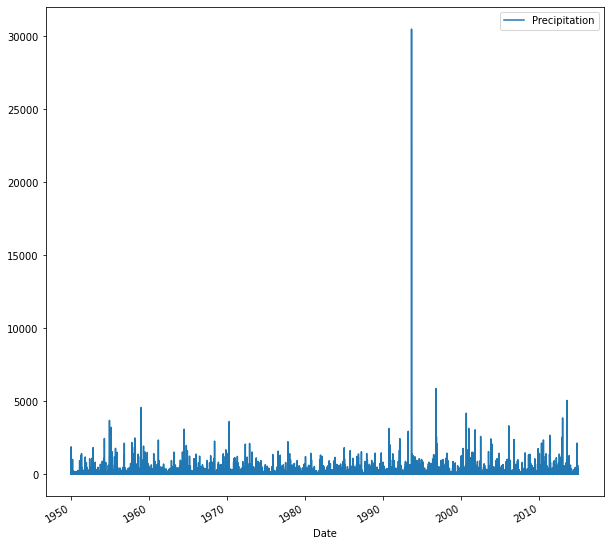

In [17]:
#plotting my data
df_pos.plot(figsize=(10,10))
plt.show()

In [18]:
#checking if data is stationary
from statsmodels.tsa.stattools import adfuller
results = adfuller(df_pos['Precipitation'])
print(results[0])
print('P value is:', results[1])

-54.96325537226066
P value is: 0.0


In [19]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

good_fit = auto_arima(df_pos['Precipitation'], trace = True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=313999.568, Time=8.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=314019.859, Time=1.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=313993.856, Time=1.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=313994.401, Time=2.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=314560.038, Time=0.92 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=313995.844, Time=2.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=313995.853, Time=7.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=313997.845, Time=12.64 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=314485.343, Time=0.32 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 37.351 seconds


In [20]:
df3 = pd.read_csv('/content/data_Precipitation.csv')
df3['Date'] = pd.to_datetime(df3['Date'])

#Splitting into train and test
train1 = df3.loc[df3['Date'] <= '1999-12-31']
test1 = df3.loc[df3['Date']>= '2000-01-01']


In [21]:
from statsmodels.tsa.arima.model import ARIMA
model_boxcox = ARIMA(train1['Precipitation'], order = (1,0,0))
model_boxcox = model_boxcox.fit()
model_boxcox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Precipitation   No. Observations:                18250
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -64204.834
Date:                Tue, 29 Mar 2022   AIC                         128415.668
Time:                        00:17:08   BIC                         128439.104
Sample:                             0   HQIC                        128423.370
                              - 18250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6417      0.088     41.221      0.000       3.469       3.815
ar.L1          0.1217      0.005     23.079      0.000       0.111       0.132
sigma2        66.5739      0.170    392.136      0.000      66.241      66.907
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):           2625661.25
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             4.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        60.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
#testing part
import datetime
start = len(train1)

end = len(train1)+len(test1)-1
test1['forecast']= model_boxcox.predict( start=start, end=end, dynamic=False)

In [23]:
test1.head()

,Date,Precipitation,forecast
18250,2000-01-01,0.000046,3.198375
18251,2000-01-02,5.651877,3.587729
18252,2000-01-03,7.189747,3.635129
18253,2000-01-04,0.971326,3.640900
18254,2000-01-05,50.309398,3.641602


In [36]:
from sklearn.metrics import mean_squared_error

print('MSE using the boxcox transform:',mean_squared_error(test1.Precipitation, test1.forecast))

MSE using the boxcox transform: 73.91905514465313


#The boxcox transform hasn't made the MSE any better. Boxcox transforms do not always yield a better MSE. Probably a log transform could have worked better in our case.

#Question 5-
Simulate Model variance with ARCH and GARCH for Time Series Forecasting. Consider a 
time series of random noise where the mean is zero and the variance starts at 0.0 and steadily 
increases.

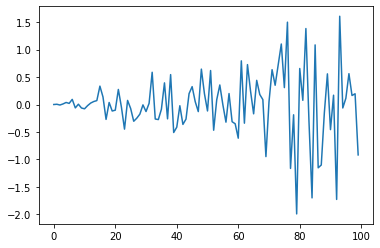

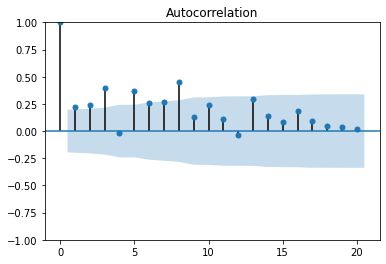

In [26]:
from random import gauss
from random import seed
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

#set seed
seed(4)
df = [gauss(0,i*0.01) for i in range (0, 100)]
df_sq = [ x**2 for x in df]

#plot the data
plt.plot(df)
plt.show()

#plot acf
plot_acf(np.asarray(df_sq))
plt.show()

significant positive correlatin till lag 15.

In [27]:
#train, test split
n_test = 10
train, test = df[:-n_test], df[-n_test:]

In [28]:
!pip install arch

     |████████████████████████████████| 902 kB 5.3 MB/s 


In [29]:
import arch
from arch import arch_model
model = arch_model(train, mean='Zero', vol ='ARCH', p = 15)

In [30]:
modelfit = model.fit()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 41.504522451939415
Iteration:      2,   Func. Count:     37,   Neg. LLF: 39.84160048057239
Iteration:      3,   Func. Count:     56,   Neg. LLF: 38.86152368289243
Iteration:      4,   Func. Count:     75,   Neg. LLF: 38.168837835452294
Iteration:      5,   Func. Count:     94,   Neg. LLF: 37.359456060716816
Iteration:      6,   Func. Count:    113,   Neg. LLF: 36.916153438658235
Iteration:      7,   Func. Count:    132,   Neg. LLF: 36.62927642773087
Iteration:      8,   Func. Count:    150,   Neg. LLF: 35.61568157968252
Iteration:      9,   Func. Count:    169,   Neg. LLF: 35.38236084253256
Iteration:     10,   Func. Count:    188,   Neg. LLF: 34.976965684955985
Iteration:     11,   Func. Count:    207,   Neg. LLF: 34.77947643918447
Iteration:     12,   Func. Count:    226,   Neg. LLF: 34.636329032030794
Iteration:     13,   Func. Count:    245,   Neg. LLF: 34.471421979520954
Iteration:     14,   Func. Count:    264,   Neg. LLF: 34.

In [31]:
#making predictions
pred = modelfit.forecast(horizon= n_test)

#Plot using ARCH model

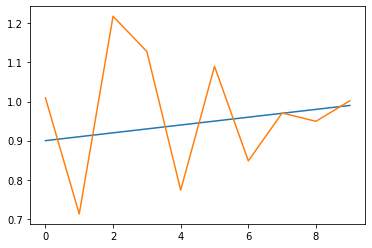

In [32]:
#plotting variance and predicted variance

var = [i*0.01 for i in range(0,100)]
plt.plot(var[-n_test:])
#plt.show()
plt.plot(pred.variance.values[-1, :])
plt.show()

In [33]:
#For the GARCH model
garch_model = arch_model(train, mean = 'Zero', vol = 'GARCH', p = 15)
garchfit = garch_model.fit()

Iteration:      1,   Func. Count:     19,   Neg. LLF: 43.295844959877854
Iteration:      2,   Func. Count:     44,   Neg. LLF: 43.243747831930406
Iteration:      3,   Func. Count:     64,   Neg. LLF: 38.99409977757669
Iteration:      4,   Func. Count:     84,   Neg. LLF: 38.219348236710395
Iteration:      5,   Func. Count:    104,   Neg. LLF: 37.77063814140541
Iteration:      6,   Func. Count:    124,   Neg. LLF: 36.85448822464735
Iteration:      7,   Func. Count:    144,   Neg. LLF: 36.28818440487556
Iteration:      8,   Func. Count:    164,   Neg. LLF: 36.018309596460604
Iteration:      9,   Func. Count:    184,   Neg. LLF: 35.83299193687124
Iteration:     10,   Func. Count:    204,   Neg. LLF: 35.72128260333963
Iteration:     11,   Func. Count:    224,   Neg. LLF: 35.24655924885105
Iteration:     12,   Func. Count:    244,   Neg. LLF: 35.0392646130409
Iteration:     13,   Func. Count:    264,   Neg. LLF: 34.84989174046595
Iteration:     14,   Func. Count:    284,   Neg. LLF: 34.7139

In [34]:
pred1 = garchfit.forecast(horizon = n_test)

#Plot using GARCH model

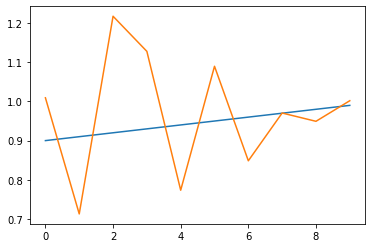

In [35]:
#plotting variance and predicted variance

var1 = [i*0.01 for i in range(0,100)]
plt.plot(var1[-n_test:])
#plt.show()
plt.plot(pred1.variance.values[-1, :])
plt.show()

In [38]:
!jupyter nbconvert --to pdf /content/CIVE_Homework6_Q4&5.ipynb

/bin/bash: 5.ipynb: command not found
[NbConvertApp] WARNING | pattern '/content/CIVE_Homework6_Q4' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent t